[2019-03-18 20:04:20,661] WARNING in __init__: Loaded app with settings: Development


No THERM_DEVICE found; disabling hardware support


/Users/markvan/.virtualenvs/therm/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


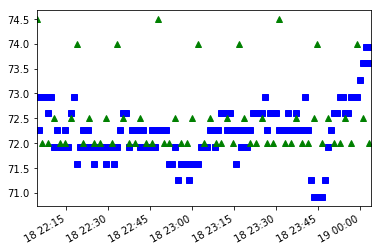

In [12]:
from therm import create_app
from therm.models import Sample, State
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd


app = create_app('Development')
%matplotlib inline

hours = 2
with app.app_context():
    samples_ts = Sample.timeseries(Sample.since(datetime.utcnow() - timedelta(hours=hours)))
    states_ts = State.timeseries(State.since(datetime.utcnow() - timedelta(hours=hours)))
    samples_df = Sample.dataframe(Sample.since(datetime.utcnow() - timedelta(hours=hours)))
    states_df = State.dataframe(State.since(datetime.utcnow() - timedelta(hours=hours)))
    
# drop some states
states_df = states_df[::2]
states_df.set_point[::7] += 2
states_df.set_point[::3] += .5

samples_df['temp'].plot(style="bs")
states_df['set_point'].plot(style="g^")

117
118
52
52


/Users/markvan/.virtualenvs/therm/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


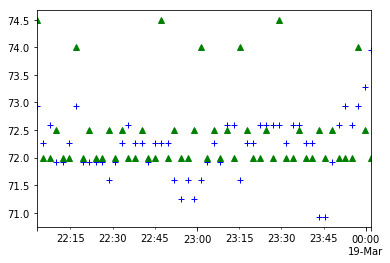

In [13]:
def jointerpolate(objs, datetime_index=None, max_points=50):
    """Join the indexes of multiple timeseries and interpolate onto the joined set of index points"""
    new_index = pd.concat(objs, axis=0).sort_index().index
    first = new_index.min()
    last = new_index.max()
    secs = int((last - first).total_seconds() // (max_points + 1))
    periodsize = "{:d}S".format(secs)
    return (o.resample(periodsize).first() for o in objs)
#     idx = pd.date_range(start=first, end=last, freq=periodsize)
#     print("idx", len(idx))
    
# #     new_index = pd.Series(index=new_index, dtype='datetime64[ns]').resample(periodsize).groupby()
#     return (pd.concat([obj, pd.Series(index=idx)], axis=0).interpolate(method='time') for obj in objs)

def interpolate_multiple(ts_list, max_points=50):
    """Interpolate multiple timeseries, using first element to select bounds

    Args:
        ts_list: list of pd.TimeSeries objects to interpolate
        max_points:

    Returns:
        list(pd.Timeseries): resampled timeserieses

    """
    combined = pd.concat(ts_list)
    first = combined.index.min()
    last = combined.index.max()
    resampled_list = []
    if first and last and not (pd.isnull(first) or pd.isnull(last)):
        # Only do resampling if we have valid bounds. If no points were found, first and last will be NaN
        secs = int((last - first).total_seconds() // (max_points + 1))
        periodsize = "{:d}S".format(secs)

        for timeseries in ts_list:
            resampled = timeseries.resample(periodsize).mean()
            # if any(resampled.isnull()):
            #     if sum(resampled.notnull()) > 4:
            #         resampled = resampled.interpolate("quadratic")
            resampled_list.append(resampled)
        return resampled_list
    else:
        return [Sample.timeseries([]) for _ in resampled_list]
    
def quantize(ts, target_points=10, max_points=None):
    max_points = max_points or target_points * 2
    if len(ts) < max_points:
        return ts
    else:
        downsamp = int(len(ts) / max_points)
        return ts[::downsamp]
    
t_min = min(pd.concat([samples_ts, states_ts]))
t_max = max(pd.concat([samples_ts, states_ts]))
# i_samp, i_state = interpolate_multiple([samples_ts, states_ts])
print(len(samples_ts.index))
print(len(states_ts.index))
# print(len(interp.index))
i_samp, i_state = jointerpolate([samples_df, states_df])
print(len(i_samp.index))
print(len(i_state.index))
i_samp['temp'].plot(style='b+')
i_state['set_point'].plot(style='g^')
# samples_ts.plot(style="b.")
# states_ts.plot(style="g.")
# q_samp = quantize(samples_ts)
# q_state = quantize(states_ts)
# qi_samp = quantize(samples_ts)
# qi_state = quantize(states_ts)
# q_samp.plot(style='b-')
# q_state.plot(style='g-')

/Users/markvan/.virtualenvs/therm/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


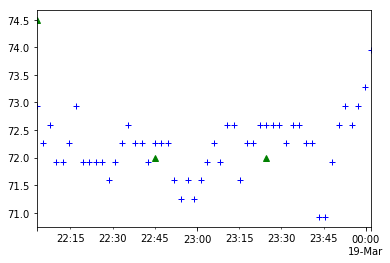

In [20]:
not_enough_state = states_df[::20]
ii_samp, ii_state = jointerpolate([samples_df, not_enough_state])

ii_samp['temp'].plot(style='b+')
ii_state['set_point'].plot(style='g^')

In [59]:

off_df = list(states_df.apply(lambda state: state.set_point if not state.heat_on else None, axis=1))
off_df

[74.5,
 72.0,
 72.0,
 72.5,
 72.0,
 72.0,
 72.5,
 74.0,
 72.0,
 72.5,
 72.0,
 72.0,
 72.5,
 72.0,
 74.0,
 72.5,
 72.0,
 72.0,
 72.5,
 72.0,
 72.0,
 74.5,
 72.0,
 72.0,
 72.5,
 72.0,
 72.0,
 72.5,
 74.0,
 72.0,
 72.5,
 72.0,
 72.0,
 72.5,
 72.0,
 74.0,
 72.5,
 72.0,
 72.0,
 72.5,
 72.0,
 72.0,
 74.5,
 72.0,
 72.0,
 72.5,
 72.0,
 72.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [ ]:
def _plot_temps_states(temps, states):
    """Generate template params for plotting the given temps

    Args:

    Returns:
        dict: params for template

    """
    temp_values = temps.temp
    
    set_points = set_points or []
    labels = [datetimefilter(s) for s in labels]
    temp_values_fmt = ["{:.2f}".format(s) if not np.isnan(s) else None for s in temps]
    set_points_fmt = ["{:.2f}".format(s) if not np.isnan(s) else None for s in set_points]
    # current_app.logger.debug("\nLabels: {}\nValues: {}".format(", ".join(labels), ", ".join(temp_values_fmt)))
    ymin = min([s for s in temps + set_points]) - 1 if temps + set_points else 0
    ymax = max([s for s in temps + set_points]) + 1 if temps + set_points else 100
    return {
        "labels": labels,
        "temp_values": temp_values_fmt,
        "set_points_heaton": set_points_fmt,
        "set_points_heatoff": set_points_fmt,
        "y_min": ymin,
        "y_max": ymax,
    }